# Welcome to Tabular Classification/Regression

## This is the user guide notebook for Preprocess asset

## According to guide notebooks, find your own arguments.

In [1]:
from wrapping import Wrapper

In [2]:
wrapper = Wrapper(0, exp_plan_file='preps_experimental_plan.yaml')

[2023-11-30 06:54:51,036][PROCESS][INFO]: Successfully loaded experimental plan yaml: 
 /home/jovyan/project2023/TCR/231130/tcr/alo/config/preps_experimental_plan.yaml
[2023-11-30 06:54:51,039][PROCESS][INFO]: Successfully loaded << experimental_plan.yaml >> from: 
 /home/jovyan/project2023/TCR/231130/tcr/alo/config/preps_experimental_plan.yaml
[2023-11-30 06:54:51,064][PROCESS][INFO]: Success versioning up experimental_plan.yaml : 2.0 --> 2.1 (version ref. : compare yaml version)
[2023-11-30 06:54:51,069][PROCESS][WARNING]: You did not write any << s3_private_key_file >> in the config yaml file. When you wanna get data from s3 storage, 
                                 you have to write the s3_private_key_file path or set << AWS_ACCESS_KEY_ID, AWS_SECRET_ACCESS_KEY >> in your os environment. 

[2023-11-30 06:54:51,072][PROCESS][INFO]: Skip loading external data. All the data in the external load data path already exist in << /home/jovyan/project2023/TCR/231130/tcr/alo/input/ >> equall

  You can safely remove it manually.


[2023-11-30 06:55:06,005][PROCESS][INFO]: ======================================== Finish dependency installation 



  You can safely remove it manually.


In [3]:
wrapper.run() # input asset 실행
data_input = wrapper.data
x_columns = wrapper.args['x_columns']
y_column = wrapper.args['y_column']

[2023-11-30 06:55:06,033][USER][INFO][train_pipeline][input]: >> Load path : ['/home/jovyan/project2023/TCR/231130/tcr/alo/input/train/preps_train/']
[2023-11-30 06:55:06,045][USER][INFO][train_pipeline][input]: >> The file for batch data has been loaded. (File name: /home/jovyan/project2023/TCR/231130/tcr/alo/input/train/preps_train/titanic_train.csv)
[2023-11-30 06:55:06,050][USER][INFO][train_pipeline][input]: ==================== Success loading dataframe ====================
[2023-11-30 06:55:06,052][USER][INFO][train_pipeline][input]: >> Drop columns from the input dataframe when set << auto >> mode or specified in the << drop_columns >> in config yaml. (dropped colums:[])
[2023-11-30 06:55:06,054][USER][INFO][train_pipeline][input]: >> Start processing ignore columns & drop columns: ['/home/jovyan/project2023/TCR/231130/tcr/alo/input/train/preps_train/titanic_train.csv']


[2023-11-30 06:55:06,030][ASSET][INFO][train_pipeline][input]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-30 06:55:06
- current step      : input
- asset branch.     : tabular_2.0
- alolib ver.       : 2.1
- alo ver.          : 2.1
- load envs. keys   : dict_keys(['project_home', 'solution_metadata_version', 'artifacts', 'alo_version', 'interface_mode', 'proc_start_time', 'save_train_artifacts_path', 'save_inference_artifacts_path', 'pipeline', 'step', 'num_step', 'asset_branch', 'load_data', 'load_config', 'save_data', 'save_config', 'log_file_path'])
- load args. keys   : dict_keys(['input_path', 'x_columns', 'use_all_x', 'y_column', 'groupkey_columns', 'drop_columns', 'time_column', 'concat_dataframes', 'encoding'])
- load config. keys : dict_keys(['meta'])
- load data keys    : dict_keys([])


Saved : /home/jovyan/project2023/TCR/231130/tcr/alo/.asset_interface/train_pipeline/input_data.pkl
Saved : /home/jovyan/project202

## Titanic 데이터를 활용해 Preprocess asset argument 설정 방법을 학습해봅니다. 

### Sample Data(train) 구성

- Titanic dataset
- 경로: tcr/sample_data/preps_train/
- x_columns: 9개 (Pclass,Name,Gender,Age,SibSp,Ticket,Fare,Cabin,Embarked)
- y_column: Survived
- 총 데이터 수: 891

#### 데이터 형태 

In [4]:
data_input['dataframe'][x_columns].head()

,Pclass,Name,Gender,Age,SibSp,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,373450,8.0500,NaN,S


#### 데이터 결측율

In [5]:
data_input['dataframe'][x_columns].isna().sum()/len(data_input['dataframe'])

Pclass      0.000000
Name        0.000000
Gender      0.000000
Age         0.198653
SibSp       0.000000
Ticket      0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

<br>  

### Preprocess asset 사용법 - Auto mode
- Preprocess asset은 입력받은 데이터를 자동으로 전처리 해주는 **auto**모드와 유저가 auto모드를 수정해서 사용하는 **custom**모드가 있습니다.
- Auto mode는 아래 기능을 적용하여 데이터를 자동으로 전처리 해줍니다.
|기능|조건|설명|
|:---:|:---:|:---:|
|x,y 컬럼 자동 형 분류|-|input 데이터의 각 컬럼이 category인지 numeric인지 구분합니다.|
|결측치 처리(y 컬럼)|-|y 컬럼에 결측치가 있을 경우 자동으로 결측치를 drop 합니다.|
|결측치 처리(x 컬럼)|데이터 결측치 10% 이하| 결측치가 가장 많은 컬럼의 결측률이 10% 이하일 때 모든 컬럼의 결측치를 drop합니다. |
|결측치 처리(x 컬럼)|데이터 결측치 10% 초과| category 컬럼은 가장 빈도가 높은 데이터로 결측치를 채우고(**frequent**), numeric 컬럼은 **median**값으로 결측치를 채웁니다 |
|cardinality|50 이상일 때|category 컬럼의 unique 값의 수(cardinality)가 50 이상일 경우 해당 컬럼을 분석 대상에서 제외합니다.| 
|categorical encoding|-|category 컬럼에 자동으로 **onehot encoding**을 적용합니다.| 
|task 분류|-|y컬럼이 있을 경우 데이터가 classification/regression 중 어디에 적합한지 판단합니다.| 

- Auto mode는 아래와 같이 작성합니다.  
```
    - step: preprocess
      args: 
        - mode: auto
          custom: {}
```
<br>
- inference 시에는 auto mode만 사용할 수 있으며, inference의 auto mode는 train에 적용한 전처리 방법론을 그대로 적용합니다. 
<br>

### Exercise A. Auto mode 사용하기
- Auto mode를 사용합니다. 

In [6]:
prep_args = wrapper.get_args(step=1)
prep_args

{'mode': 'auto', 'custom': {}}

- preprocess asset을 구동합니다.

In [7]:
wrapper.run(args=prep_args)
data_preps = wrapper.data

[2023-11-30 06:57:18,507][USER][WARNING][train_pipeline][preprocess]: Name의 자주 등장하는 top10 데이터가 object이므로 category_column으로 분류합니다.
[2023-11-30 06:57:18,514][USER][WARNING][train_pipeline][preprocess]: Gender의 자주 등장하는 top10 데이터가 object이므로 category_column으로 분류합니다.
[2023-11-30 06:57:18,517][USER][WARNING][train_pipeline][preprocess]: Embarked의 자주 등장하는 top10 데이터가 object이므로 category_column으로 분류합니다.
[2023-11-30 06:57:18,521][USER][WARNING][train_pipeline][preprocess]: Ticket의 자주 등장하는 top10 데이터가 object이므로 category_column으로 분류합니다.
[2023-11-30 06:57:18,524][USER][WARNING][train_pipeline][preprocess]: Cabin의 자주 등장하는 top10 데이터가 object이므로 category_column으로 분류합니다.
[2023-11-30 06:57:18,528][USER][WARNING][train_pipeline][preprocess]: 컬럼 prep_Name의 cardinality가 50를 초과하여 category_column에서 drop합니다.
[2023-11-30 06:57:18,532][USER][WARNING][train_pipeline][preprocess]: 컬럼 prep_Ticket의 cardinality가 50를 초과하여 category_column에서 drop합니다.
[2023-11-30 06:57:18,535][USER][WARNING][train_pipeline][preprocess]: 컬럼 

Loaded : /home/jovyan/project2023/TCR/231130/tcr/alo/.asset_interface/train_pipeline/input_config.pkl
Loaded : /home/jovyan/project2023/TCR/231130/tcr/alo/.asset_interface/train_pipeline/input_data.pkl
[2023-11-30 06:57:18,483][ASSET][INFO][train_pipeline][preprocess]: Successfully got model path for saving or loading your AI model: 
 /home/jovyan/project2023/TCR/231130/tcr/alo/.train_artifacts/models/preprocess/
[2023-11-30 06:57:18,486][ASSET][INFO][train_pipeline][preprocess]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-30 06:57:18
- current step      : preprocess
- asset branch.     : prep_v1.1.0
- alolib ver.       : 2.1
- alo ver.          : 2.1
- load envs. keys   : dict_keys(['project_home', 'solution_metadata_version', 'artifacts', 'alo_version', 'interface_mode', 'proc_start_time', 'save_train_artifacts_path', 'save_inference_artifacts_path', 'pipeline', 'step', 'num_step', 'asset_branch', 'load_data', 'load_config',

#### 로그 확인
- preprocess asset을 run할 때 아래와 같이 각 컬럼 분류 과정을 로그로 확인할 수 있습니다.
<div style='text-align:left'><img src="src/preps_logs.PNG" /></div>
- Titanic 데이터의 x_columns(Pclass, Name, Gender, Age, SibSp, Ticket, Fare, Cabin, Embarked) 중에 Cabin, Ticket, Name은 cardinality가 50을 초과하여 분석 대상에서 빠지게 되었습니다. 
- 결과적으로 **category 컬럼**으로 Embarked, Gender, **numeric 컬럼**으로 Pclass, Age, SibSp, Fare분류함을 확인가능합니다. 
<br></br>

#### input data와 preprocess asset 결과 data 비교 
- preprocess asset을 지나고나면 컬럼명 앞에 'prep_'라는 prefix가 붙고, 인코딩에 따라 컬럼 수가 늘어납니다.

In [8]:
data_input['dataframe'].shape, data_preps['dataframe'].shape

((891, 11), (891, 15))

In [9]:
data_preps['dataframe'].head()

,prep_Cabin,prep_Name,prep_Ticket,PassengerId,prep_Gender_female,prep_Gender_male,prep_Embarked_C,prep_Embarked_Q,prep_Embarked_S,prep_Age,prep_Fare,prep_Pclass,prep_SibSp,Survived_original,prep_Survived
0,NaN,"Braund, Mr. Owen Harris",A/5 21171,1,0.0,1.0,0.0,0.0,1.0,22.0,7.2500,3.0,1.0,0,0
1,C85,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,2,1.0,0.0,1.0,0.0,0.0,38.0,71.2833,1.0,1.0,1,1
2,NaN,"Heikkinen, Miss. Laina",STON/O2. 3101282,3,1.0,0.0,0.0,0.0,1.0,26.0,7.9250,3.0,0.0,1,1
3,C123,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,4,1.0,0.0,0.0,0.0,1.0,35.0,53.1000,1.0,1.0,1,1
4,NaN,"Allen, Mr. William Henry",373450,5,0.0,1.0,0.0,0.0,1.0,35.0,8.0500,3.0,0.0,0,0


<br></br>
##### Categorical Encoding 확인
- category 컬럼으로 분류 된 Embarked, Gender 두가지 컬럼이 onehot encoding이 되어있음을 확인할 수 있습니다. 

In [10]:
data_preps['dataframe'].columns

Index(['prep_Cabin', 'prep_Name', 'prep_Ticket', 'PassengerId',
       'prep_Gender_female', 'prep_Gender_male', 'prep_Embarked_C',
       'prep_Embarked_Q', 'prep_Embarked_S', 'prep_Age', 'prep_Fare',
       'prep_Pclass', 'prep_SibSp', 'Survived_original', 'prep_Survived'],
      dtype='object')

In [11]:
data_preps['dataframe'][['prep_Gender_female', 'prep_Gender_male', 'prep_Embarked_C','prep_Embarked_Q', 'prep_Embarked_S']].head()

,prep_Gender_female,prep_Gender_male,prep_Embarked_C,prep_Embarked_Q,prep_Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0


<br></br>
##### 결측치 비교
- input data의 경우 Age, Cabin, Embarked 세개의 컬럼에 결측치가 존재합니다. 
- Cadinality가 50이상이어서 drop 된 Cabin 컬럼을 제외하고, Age의 결측률이 0.19이므로 titanic 데이터의 결측치는 10%를 초과합니다. 
- 따라서 auto mode에서는 자동으로 numeric 컬럼의 결측치는 median 값으로 채워지고, category 컬럼의 결측치는 frequent 값으로 채워집니다.

In [12]:
# input data의 결측치
data_input['dataframe'][['Age','Cabin','Embarked']].isna().sum()/len(data_input['dataframe'])

Age         0.198653
Cabin       0.771044
Embarked    0.002245
dtype: float64

- preprocess asset을 지난 후 Age, Embarked의 결측치가 사라졌음을 확인할 수 있습니다. 

In [13]:
data_preps['dataframe'][['prep_Age','prep_Cabin','prep_Embarked_C','prep_Embarked_Q','prep_Embarked_S']].isna().sum()/len(data_preps['dataframe'])

prep_Age           0.000000
prep_Cabin         0.771044
prep_Embarked_C    0.000000
prep_Embarked_Q    0.000000
prep_Embarked_S    0.000000
dtype: float64

- Age의 median 값(28.0)이 Age의 nan값을 대체함을 확인할 수 있습니다.

In [14]:
# Age의 median 값
data_input['dataframe']['Age'].median()

28.0

In [15]:
# input data의 Age nan값 확인
data_input['dataframe']['Age'].loc[888]

nan

In [16]:
# preprocess asset 결과 nan값 median으로 대체 확인
data_preps['dataframe']['prep_Age'].loc[888]

28.0

- Embarked의 Frequent값(S)로 Embarked의 nan값이 대체됨을 확인할 수 있습니다. 

In [17]:
# Embarked 값 확인
data_input['dataframe']['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
# input data의 Embarked nan값 확인
data_input['dataframe']['Embarked'].loc[61]

nan

In [19]:
# preprocess asset 결과 nan값 frequent로 대체 확인 
data_preps['dataframe'][['prep_Embarked_C','prep_Embarked_Q','prep_Embarked_S']].loc[61]

prep_Embarked_C    0.0
prep_Embarked_Q    0.0
prep_Embarked_S    1.0
Name: 61, dtype: float64

<br></br>
### Preprocess asset 사용법 - Custom mode
- Custom mode에서는 유저가 원하는 전처리 방식을 컬럼마다 적용할 수 있습니다. 
- Custom mode의 기본값은 auto mode로 auto mode에서 수정하고 싶은 부분을 argument로 작성하여 `custom: {}`안에 넣으면 됩니다. 
- 조정 가능한 arguments는 아래와 같습니다.
*\*arguments의 default 값은 auto mode입니다*  

1) category_columns
    - 데이터가 numeric이지만 category 컬럼으로 처리되어야 하는 경우 컬럼명을 입력합니다.  
    - example  
        `custom: {category_columns: [col1,col2,col3]}`
<br></br>
2) numeric_columns
    - 데이터가 category지만 numeric 컬럼으로 처리되어야 하는 경우 컬럼명을 입력합니다.
    - 만약 해당 컬럼에 numeric로 변환되지 않는 값(str)이 입력되면 자동으로 np.nan 처리 합니다. 
    - example  
        `custom: {numeric_columns: [col1,col2,col3]}` 
<br></br>
3) cardinality
    - cardinality는 컬럼에 있는 unique한 값의 개수를 의미하며, category 컬럼의 cardinality가 지정한 cardinality argument 값보다 크면 해당 컬럼을 drop합니다.
    - example  
        `custom: {cardinality: 80}` 
<br></br>
4) categorical_encoding
    - category 컬럼에 적용할 인코딩 방법론을 지정합니다. {방법론: 값}의 dictionary형태로 input을 받습니다.
        |방법론(key)|값(values)|
        |:---:|:---:|
        |onehot<br>label|[col1, col2, col3]<br>all(모든 category 컬럼에 적용)|
    - 현재 onehot encoding(**onehot**)과 label encoding(**label**)을 지원합니다. 
    - 입력한 {방법론: 컬럼} 외 나머지 컬럼에는 default rule(auto mode)인 onehot encoding이 적용됩니다. 
    - example  
        `custom: {categorical_encoding: {label: all}}`  
        `custom: {categorical_encoding: {label: [col1,col2]}}`  
        - col1,col2만 label인코딩을 적용하고 나머지 category 컬럼은 onehot을 적용합니다.    
<br></br>

5) handle_missing
    - category, numeric 컬럼에 적용할 결측치 처리 방식을 지정합니다. {방법론: 값}의 dictionary형태로 input을 받습니다.
        |방법론(key)|값(values)|
        |:---:|:---:|
        |category 컬럼용: frequent<br>numeric 컬럼용: interpolation, mean, median<br>모든 컬럼용: drop, fill_숫자 |[col1, col2, col3]<br>all(모든 컬럼에 적용)<br>category_all(모든 category컬럼에 적용)<br>numeric_all(모든 numeric 컬럼에 적용)|
    - category 컬럼용 방법론으로 최빈값으로 채우기(**frequent**)가 있습니다.
    - numeric 컬럼용 방법론으로 주변값 채우기인 **interpolation**과 **mean, median**값을 입력할 수 있습니다. 
    - 또한 모든 컬럼에 적용할 수 있는 방법론으로 결측치 행 삭제(**drop**)과 특정 숫자 값을 numeric이나 category 컬럼에 채우는 **fill_숫자**가 있습니다.   
    - 입력한 {방법론: 컬럼} 외 나머지 컬럼에는 default rule(auto mode)인 결측치 10% 초과 시 **median**(numeric), **frequent**(category)/ 결측치 10% 미만일 떄는 **drop**이 적용됩니다. 
    - example  
        `custom: {handle_missing: {fill_1: [col1,col2], fill_2: category_all}}` <br>
        `custom: {handle_missing: {drop: category_all, interpolation:[col1,col2], mean: numeric_all}`
    - 참고 사항
        - {frequent: all}일 경우 frequent는 category 컬럼에 적용되는 방법론이기 떄문에 category 컬럼에만 적용되고, 나머지 numeric 컬럼에는 default rule이 적용됩니다.
        - {frequent: all, drop: all} 일 경우, frequent에 category_all, drop에 나머지 컬럼(numeric_all)이 들어갑니다. 
        - 마찬가지로 {mean: all, drop: all} 일 경우, mean에 numeric_all, drop에 나머지 컬럼(category_all)이 들어갑니다. 
<br></br>
6) numeric_outlier
    - numeric_outlier는 numeric 컬럼에 적용할 outlier 제거 방법을 선택합니다. {방법론: 값}의 dictionary형태로 input을 받습니다.
        |방법론(key)|값(values)|
        |:---:|:---:|
        |normal|[col1, col2, col3]<br>all(모든 numeric 컬럼에 적용)|
    - 현재 데이터 분포에서 3sigma를 넘는 이상치를 삭제하는 nomal을 지원합니다. 
    - example  
        `custom: {numeric_outlier: {normal:[col1,col2,col3]}}` 
<br></br>
7) numeric_scaler
    - numeric_scaler는 numeric 컬럼에 적용할 scaling방법을 선택합니다. {방법론: 값}의 dictionary형태로 input을 받습니다.
        |방법론(key)|값(values)|
        |:---:|:---:|
        |standard<br>minmax<br>robust<br>maxabs<br>normalizer|[col1, col2, col3]<br>all(모든 numeric 컬럼에 적용)|
    - 5가지 scaler를 제공합니다
        - StandardScaler(**standard**), MinMaxScaler(**minmax**), RobustScaler(**robust**), MaxAbsScaler(**maxabs**), Normalizer(**normalizer**)
    - example  
        `custom: {numeric_scaler: {standard: [col1,col2], minmax: all}}` 
<br></br>

<br></br>
### Exercise B. custom mode 사용하기
- 아래는 custom mode를 활용하여 사용자가 데이터에 다양한 전처리 방법론을 적용하기 위한 예제입니다.
- 따라서 데이터 분류 성능과 관계없이 여러가지 방법론을 적용하는 상황을 가정하였습니다. 
- 아래 상황에 맞추어 custom {}안에 arguments를 setting하겠습니다. 
    - 현재 numeric 컬럼으로 구분된 Pclass를 category 컬럼으로 지정  
        `custom: { 'category_columns': ['Pclass'] }`
    - Embarked 컬럼에는 label encoding(label)을 적용합니다.  
        `custom: { 'categorical_encoding': {'label': ['Embarked']} }`
    - 결측치는 다음의 규칙을 적용합니다.   
        - Age: mean  
        - category 컬럼들: drop  
        `custom: { 'handle_missing': {'mean': ['Age'], 'drop': 'category_all'} }`
    - Scaler는 다음의 규칙을 적용합니다.   
        - Age: standard scaler(standard) 
        - Fare: minmax scaler(minmax)  
        `custom: { 'numeric_scaler': {'standard': ['Age'], 'minmax': ['Fare']} }`

In [20]:
prep_args = wrapper.get_args(step=1)
prep_args['mode'] = 'custom'
prep_args['custom']['category_columns'] = ['Pclass']
prep_args['custom']['categorical_encoding'] = {'label': ['Embarked']}
prep_args['custom']['handle_missing'] = {'mean': ['Age'], 'drop': 'category_all'}
prep_args['custom']['numeric_scaler'] = {'standard': ['Age'], 'minmax': ['Fare']}

In [21]:
prep_args

{'mode': 'custom',
 'custom': {'category_columns': ['Pclass'],
  'categorical_encoding': {'label': ['Embarked']},
  'handle_missing': {'mean': ['Age'], 'drop': 'category_all'},
  'numeric_scaler': {'standard': ['Age'], 'minmax': ['Fare']}}}

- preprocess asset을 구동합니다.

In [22]:
wrapper.run(args=prep_args)
data_preps = wrapper.data

[2023-11-30 07:04:32,591][USER][WARNING][train_pipeline][preprocess]: Name의 자주 등장하는 top10 데이터가 object이므로 category_column으로 분류합니다.
[2023-11-30 07:04:32,595][USER][WARNING][train_pipeline][preprocess]: Gender의 자주 등장하는 top10 데이터가 object이므로 category_column으로 분류합니다.
[2023-11-30 07:04:32,599][USER][WARNING][train_pipeline][preprocess]: Embarked의 자주 등장하는 top10 데이터가 object이므로 category_column으로 분류합니다.
[2023-11-30 07:04:32,602][USER][WARNING][train_pipeline][preprocess]: Ticket의 자주 등장하는 top10 데이터가 object이므로 category_column으로 분류합니다.
[2023-11-30 07:04:32,606][USER][WARNING][train_pipeline][preprocess]: Cabin의 자주 등장하는 top10 데이터가 object이므로 category_column으로 분류합니다.
[2023-11-30 07:04:32,610][USER][WARNING][train_pipeline][preprocess]: 컬럼 prep_Name의 cardinality가 50를 초과하여 category_column에서 drop합니다.
[2023-11-30 07:04:32,613][USER][WARNING][train_pipeline][preprocess]: 컬럼 prep_Ticket의 cardinality가 50를 초과하여 category_column에서 drop합니다.
[2023-11-30 07:04:32,616][USER][WARNING][train_pipeline][preprocess]: 컬럼 

Loaded : /home/jovyan/project2023/TCR/231130/tcr/alo/.asset_interface/train_pipeline/input_config.pkl
Loaded : /home/jovyan/project2023/TCR/231130/tcr/alo/.asset_interface/train_pipeline/input_data.pkl
[2023-11-30 07:04:32,583][ASSET][INFO][train_pipeline][preprocess]: Successfully got model path for saving or loading your AI model: 
 /home/jovyan/project2023/TCR/231130/tcr/alo/.train_artifacts/models/preprocess/
[2023-11-30 07:04:32,585][ASSET][INFO][train_pipeline][preprocess]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-30 07:04:32
- current step      : preprocess
- asset branch.     : prep_v1.1.0
- alolib ver.       : 2.1
- alo ver.          : 2.1
- load envs. keys   : dict_keys(['project_home', 'solution_metadata_version', 'artifacts', 'alo_version', 'interface_mode', 'proc_start_time', 'save_train_artifacts_path', 'save_inference_artifacts_path', 'pipeline', 'step', 'num_step', 'asset_branch', 'load_data', 'load_config',

#### 로그 확인
- preprocess asset을 run할 때 아래와 같이 각 컬럼 분류 과정을 로그로 확인할 수 있습니다.
<div style='text-align:left'><img src="src/preps_logs2.PNG" /></div>
- **category 컬럼**으로 Pclass, Embarked, Gender, **numeric 컬럼**으로 Age, SibSp, Fare가 분류됨을 확인할 수 있습니다. 
- `category_columns = ['Pclass']`가 반영되었음을 알 수 있습니다. 
<br></br>

#### input data와 preprocess asset 결과 data 비교 
##### Categorical Encoding 확인
- `categorical_encoding: {'label': ['Embarked']}`를 입력했기 때문에, 총 3개의 category 컬럼(Pclass, Embarked, Gender) 중 Embarked에는 label encoding이 적용되고, 나머지 Pclass와 Gender에는 onehot encoding(default)이 적용됩니다. 
- 아래 Embarked 컬럼을 확인해보면, S->2, C-> 0, Q->1로 변환됨을 확인할 수 있습니다.

In [23]:
data_preps['dataframe'].columns

Index(['prep_Cabin', 'prep_Name', 'prep_Ticket', 'PassengerId',
       'prep_Embarked', 'prep_Pclass_1', 'prep_Pclass_2', 'prep_Pclass_3',
       'prep_Gender_female', 'prep_Gender_male', 'prep_Age', 'prep_Fare',
       'prep_SibSp', 'Survived_original', 'prep_Survived'],
      dtype='object')

In [24]:
data_input['dataframe']['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
data_preps['dataframe']['prep_Embarked'].value_counts()

2    644
0    168
1     77
Name: prep_Embarked, dtype: int64

- 아래 Pclass, Gender onehot encoding이 적용되었습니다. 

In [26]:
data_preps['dataframe'][['prep_Gender_male','prep_Gender_female']].value_counts()

prep_Gender_male  prep_Gender_female
1.0               0.0                   577
0.0               1.0                   312
dtype: int64

In [27]:
data_preps['dataframe'][['prep_Pclass_1','prep_Pclass_2','prep_Pclass_3']].value_counts()

prep_Pclass_1  prep_Pclass_2  prep_Pclass_3
0.0            0.0            1.0              491
1.0            0.0            0.0              214
0.0            1.0            0.0              184
dtype: int64

<br></br>
##### 결측치 비교
- input data의 경우 Age, Cabin, Embarked 세개의 컬럼에 결측치가 존재합니다. 
- Cabin의 경우에는 cardinality가 50이상이므로 분석 대상에서 제거됩니다. 
- `custom: { 'handle_missing': {'mean': ['Age'], 'drop': 'category_all'} }`를 입력했기 때문에, Age 결측치는 mean값이 채워지고, category 컬럼에 대해서는 결측치가 drop 될 것입니다.
- preprocess asset을 지난 후 Age, Embarked의 결측치가 사라졌음을 확인할 수 있습니다. 

In [28]:
data_preps['dataframe'][['prep_Age','prep_Embarked']].isna().sum()/len(data_preps['dataframe'])

prep_Age         0.0
prep_Embarked    0.0
dtype: float64

- Age 컬럼의 5, 17, 19번째 데이터는 nan값입니다. 해당 위치에 Age값의 평균이 들어감을 확인할 수 있습니다. 
- Age에 standard scaler를 적용했기 때문에 평균값이 0으로 변환되었습니다.

In [29]:
data_input['dataframe']['Age'].loc[5], data_input['dataframe']['Age'].loc[17], data_input['dataframe']['Age'].loc[19]

(nan, nan, nan)

In [30]:
round(data_preps['dataframe']['prep_Age'].loc[5],3), round(data_preps['dataframe']['prep_Age'].loc[5],3), round(data_preps['dataframe']['prep_Age'].loc[5],3)

(-0.0, -0.0, -0.0)

- Embarked의 결측치가 삭제되어 전체 데이터 수가 Embarked의 결측치 수 만큼 줄어들었습니다. 

In [31]:
# Embarkd의 결측치 수
sum(data_input['dataframe']['Embarked'].isna())

2

In [32]:
# data_input의 shape과 data_preps의 shape: 행 2개 삭제
data_input['dataframe'].shape, data_preps['dataframe'].shape

((891, 11), (889, 15))

<br></br>
##### Scaler 확인
- `custom: { 'numeric_scaler': {'standard': ['Age'], 'minmax': ['Fare']} }`을 입력했기 때문에 Age 컬럼에는 standard scaler, Fare 컬럼에는 minmax scaler가 적용되었습니다. 
- 아래 표를 보면 prep_Age컬럼이 평균이 1, 표준편차가 0이 됨을 확인할 수 있습니다.  
- prep_Fare 컬럼은 min값이 0, max값이 1이 되었음을 확인할 수 있습니다. 

            Age      Fare  prep_Age  prep_Fare
count  714.0000  891.0000  889.0000   889.0000
mean    29.6991   32.2042   -0.0000     0.0626
std     14.5265   49.6934    1.0006     0.0970
min      0.4200    0.0000   -2.2546     0.0000
25%     20.1250    7.9104   -0.5896     0.0154
50%     28.0000   14.4542   -0.0000     0.0282
75%     38.0000   31.0000    0.4134     0.0605
max     80.0000  512.3292    3.8853     1.0000


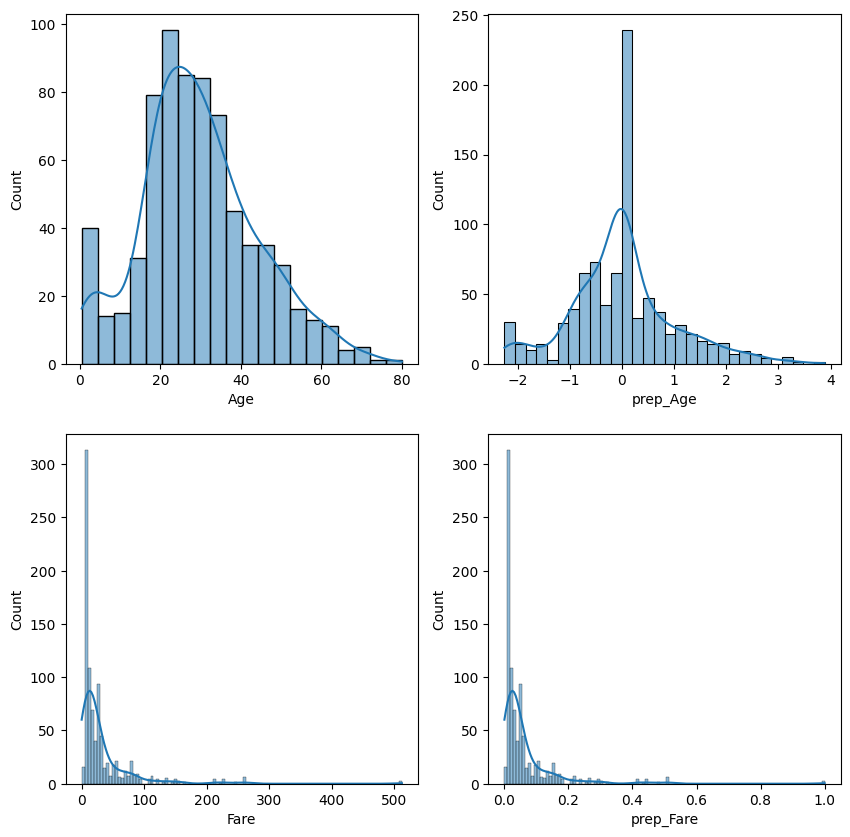

In [33]:
import pandas as pd; import matplotlib.pyplot as plt; import seaborn as sns
print(pd.concat([data_input['dataframe'][['Age','Fare']].describe().apply(lambda x:round(x,4)),
            data_preps['dataframe'][['prep_Age','prep_Fare']].describe().apply(lambda x:round(x,4))],axis=1))


fig, axs = plt.subplots(nrows=2,ncols=2); fig.set_figheight(10); fig.set_figwidth(10)
sns.histplot(data_input['dataframe']['Age'],kde=True, ax=axs[0][0])
sns.histplot(data_preps['dataframe']['prep_Age'],kde=True, ax=axs[0][1])
sns.histplot(data_input['dataframe']['Fare'],kde=True, ax=axs[1][0])
sns.histplot(data_preps['dataframe']['prep_Fare'],kde=True, ax=axs[1][1])

plt.show()

<br></br>
#### TCR-train 구동
- preprocess asset에서 데이터를 니즈에 맞게 전처리하고 TCR로 학습을 진행하면 데이터 전처리 부터 분류 모델링이 완성됩니다.

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
[2023-11-30 07:05:02,441][USER][INFO][train_pipeline][train]: yaml에 입력된 task가 실행됩니다: classification


font: ['NanumBarunGothic']
Loaded : /home/jovyan/project2023/TCR/231130/tcr/alo/.asset_interface/train_pipeline/preprocess_config.pkl
Loaded : /home/jovyan/project2023/TCR/231130/tcr/alo/.asset_interface/train_pipeline/preprocess_data.pkl
[2023-11-30 07:05:02,430][ASSET][INFO][train_pipeline][train]: Successfully got model path for saving or loading your AI model: 
 /home/jovyan/project2023/TCR/231130/tcr/alo/.train_artifacts/models/train/
[2023-11-30 07:05:02,432][ASSET][INFO][train_pipeline][train]: Successfully got << output path >> for saving your data into csv or jpg file: 
 /home/jovyan/project2023/TCR/231130/tcr/alo/.train_artifacts/output/train/ 
 - [NOTE] The names of output file must be fixed as << output.csv, output.jpg >> 
[2023-11-30 07:05:02,434][ASSET][INFO][train_pipeline][train]: 

============================= ASSET START =============================
- time (UTC)        : 2023-11-30 07:05:02
- current step      : train
- asset branch.     : tcr_v1.1.4
- alolib ver.  

100%|██████████| 36/36 [00:01<00:00, 33.30it/s]

학습이 완료되었습니다.



@scoring_classification func. - label list: @scoring_classification func. - label list: @scoring_classification func. - label list: @scoring_classification func. - label list: @scoring_classification func. - label list: @scoring_classification func. - label list: @scoring_classification func. - label list:   @scoring_classification func. - label list:   @scoring_classification func. - label list: {0, 1}  {0, 1}{0, 1}{0, 1}   

{0, 1}

{0, 1}{0, 1}{0, 1}{0, 1}






The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[INFO] 평가 지표는 ( accuracy ) 를 사용합니다. 
모델 정보 로그를 저장합니다. (저장위치: /home/jovyan/project2023/TCR/231130/tcr/alo/.train_artifacts/models/train/model_selection.json)

Top 1 model file is saved: /home/jovyan/project2023/TCR/231130/tcr/alo/.train_artifacts/models/train/best_model_top0.pkl
[Score] accuracy: 0.8268
[Hyper-parameters] max_depth: 5, n_estimators: 100, verbose: 0, random_state: 1234, thread_count: 6, allow_writing_files: False, 

Top 2 model file is saved: /home/jovyan/project2023/TCR/231130/tcr/alo/.train_artifacts/models/train/best_model_top1.pkl
[Score] accuracy: 0.8256
[Hyper-parameters] max_depth: 7, n_estimators: 300, verbose: 0, random_state: 1234, thread_count: 6, allow_writing_files: False, 

Top 3 model file is saved: /home/jovyan/project2023/TCR/231130/tcr/alo/.train_artifacts/models/train/best_model_top2.pkl
[Score] accuracy: 0.8245
[Hyper-parameters] max_depth: 9, n_estimators: 500, verbose: 0, random_state: 1234, thread_count: 6, allow_writing_files: False, 

Following 

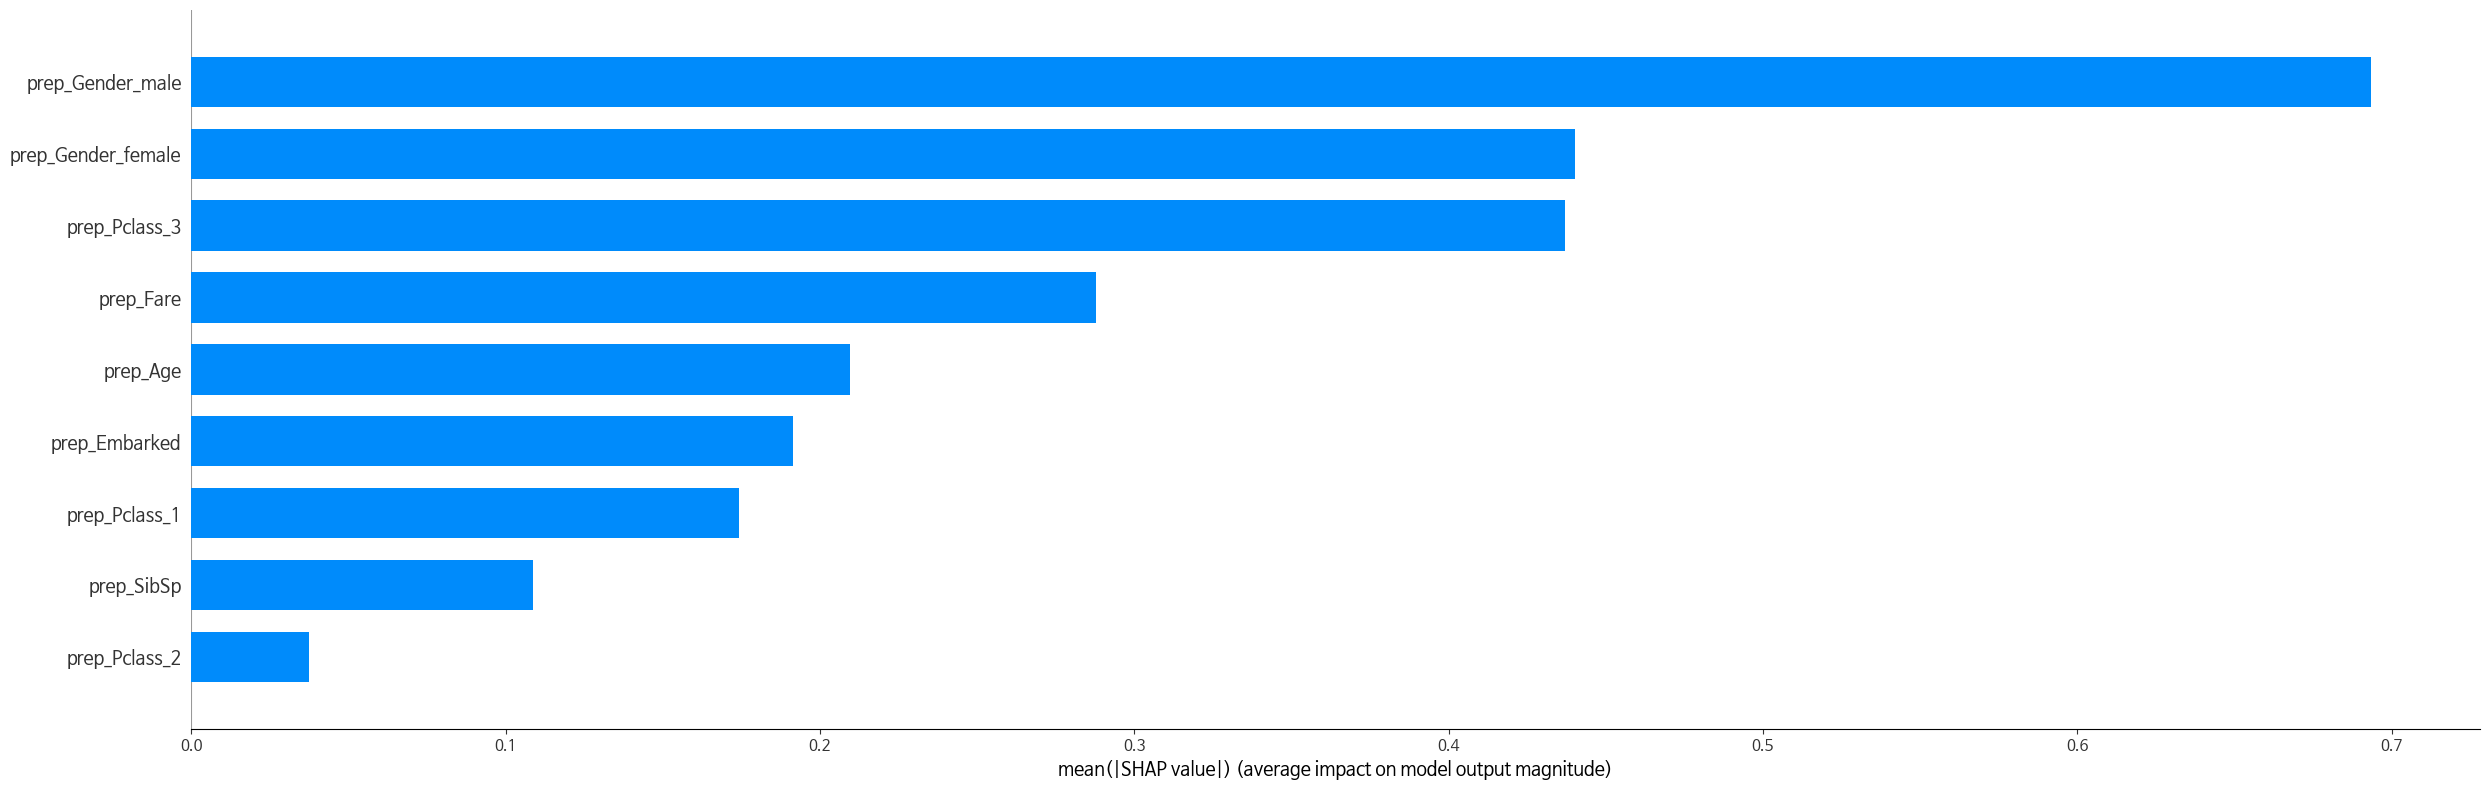

In [34]:
wrapper.run(step=2)